In [1]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [ ]:
importlib.reload(EyeTraumaAnalysis);

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2

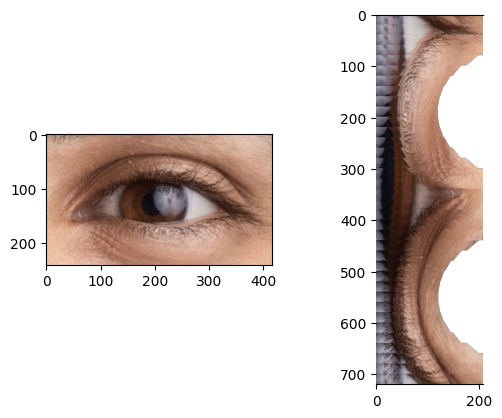

In [126]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")

interval_deg = 10
segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=interval_deg,
    wd_px=20,
    center=image.center, borderValue=(0,0,0,0) )
concatenated = np.vstack([segment for ind,segment in segments.items()])

fig, axs = plt.subplots(1,2)
axs[0].imshow(image.img);
axs[1].imshow(concatenated);
axs[1].spines["left"].set_visible(False)
axs[1].spines["right"].set_visible(False)

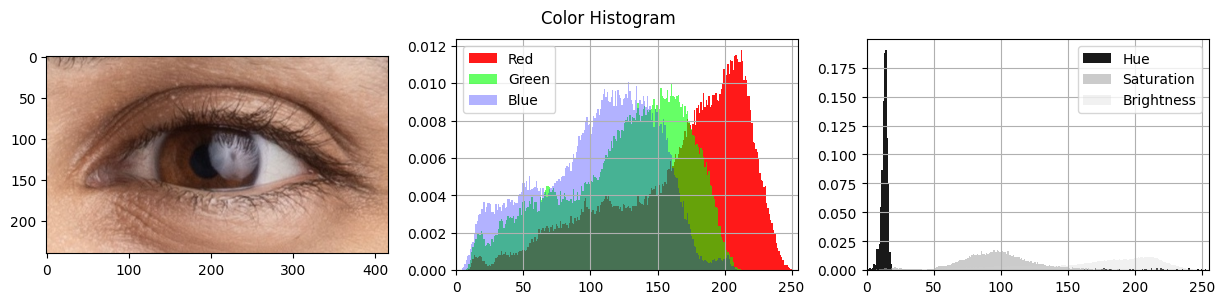

In [130]:
img_rgb = image.img
img_hsv = mpl.colors.rgb_to_hsv(img_rgb[...,:3]/255.0) * 255

fig, axs = plt.subplots(1, 3, figsize=(15,3))
axs[0].imshow(img_rgb)
axs[1].hist(img_rgb[...,0].ravel(),256,[0,256],density=True, alpha=.9, facecolor=[1,0,0], label="Red");
axs[1].hist(img_rgb[...,1].ravel(),256,[0,256],density=True, alpha=.6, facecolor=[0,1,0], label="Green");
axs[1].hist(img_rgb[...,2].ravel(),256,[0,256],density=True, alpha=.3, facecolor=[0,0,1], label="Blue");
axs[1].grid()
axs[1].set_xlim([0, 255]);
axs[1].legend();

axs[2].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, alpha=.9, facecolor="black", label="Hue");
axs[2].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, alpha=.6, facecolor="darkgray", label="Saturation");
axs[2].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, alpha=.3, facecolor="lightgray", label="Brightness");
axs[2].grid()
axs[2].set_xlim([0, 255]);
axs[2].legend();
fig.suptitle("Color Histogram");

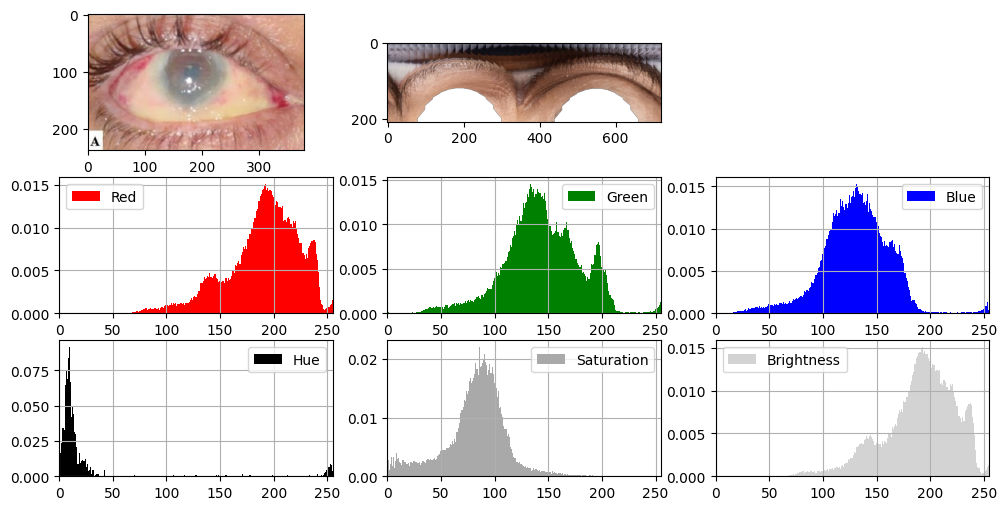

In [151]:
image = EyeTraumaAnalysis.Image("data/01_raw/00001_li.jpg")

img_hsv = mpl.colors.rgb_to_hsv(image.img[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, figsize=(12,6))

axs[0,0].imshow(image.img)

axs[0,1].imshow(np.transpose(concatenated, axes=[1,0,2]))
axs[0,2].axis("off")

axs[1,0].hist(image.img[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red");
axs[1,1].hist(image.img[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green");
axs[1,2].hist(image.img[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue");

axs[2,0].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, facecolor="black", label="Hue");
axs[2,1].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation");
axs[2,2].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, facecolor="lightgray", label="Brightness");

for ind, ax in enumerate(axs[1:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()

#plt.hist(img_hsv[...,0].ravel(),256,[0,256],density=True, alpha=.3, edgecolor="red", label="H");
#plt.hist(img_hsv[...,1].ravel(),256,[0,256],density=True, alpha=.3, edgecolor="green");



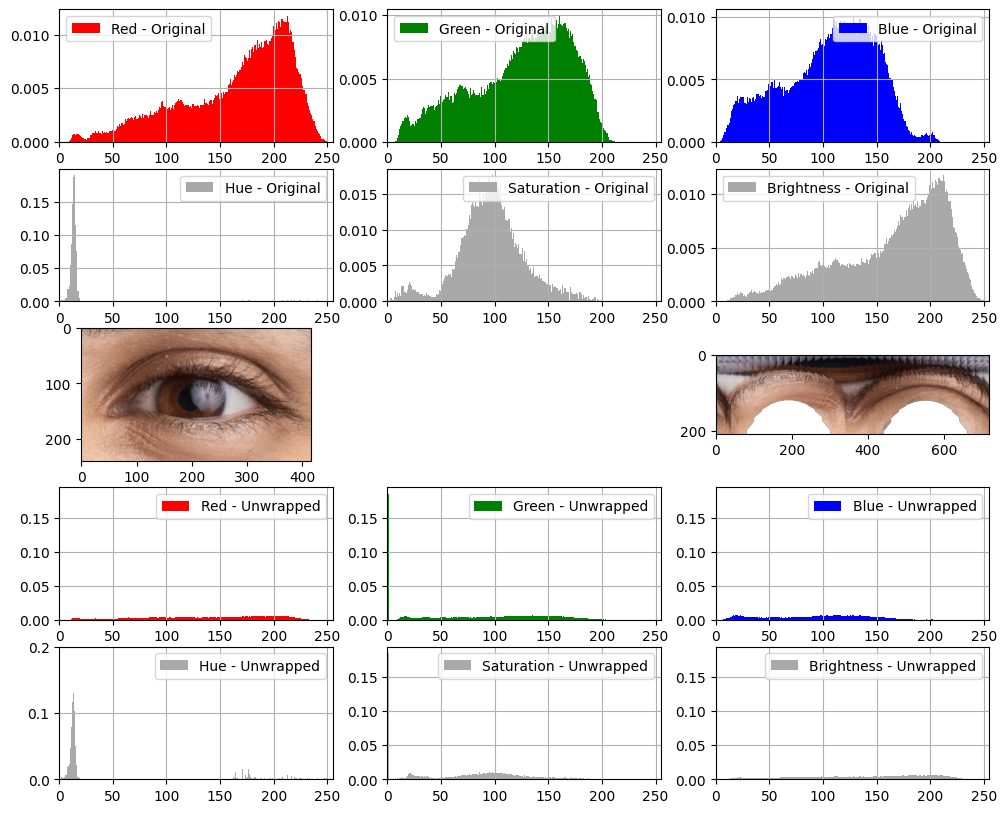

In [113]:
img_rgb1 = image.img
img_hsv1 = mpl.colors.rgb_to_hsv(img_rgb1[...,:3]/255.0) * 255

fig, axs = plt.subplots(5, 3, figsize=(12,10))

axs[0,0].hist(img_rgb1[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red - Original");
axs[0,1].hist(img_rgb1[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green - Original");
axs[0,2].hist(img_rgb1[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue - Original");

axs[1,0].hist(img_hsv1[...,0].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Hue - Original");
axs[1,1].hist(img_hsv1[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation - Original");
axs[1,2].hist(img_hsv1[...,2].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Brightness - Original");

for ind, ax in enumerate(axs[:2,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()

axs[2,0].imshow(image.img)
axs[2,1].axis("off")
axs[2,2].imshow(np.transpose(concatenated, axes=[1,0,2]))

img_rgb2 = np.vstack([segment for ind,segment in segments.items()])
img_hsv2 = mpl.colors.rgb_to_hsv(img_rgb2[...,:3]/255.0) * 255

axs[3,0].hist(img_rgb2[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red - Unwrapped");
axs[3,1].hist(img_rgb2[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green - Unwrapped");
axs[3,2].hist(img_rgb2[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue - Unwrapped");

axs[4,0].hist(img_hsv2[...,0].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Hue - Unwrapped");
axs[4,1].hist(img_hsv2[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation - Unwrapped");
axs[4,2].hist(img_hsv2[...,2].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Brightness - Unwrapped");

for ind, ax in enumerate(axs[3:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()


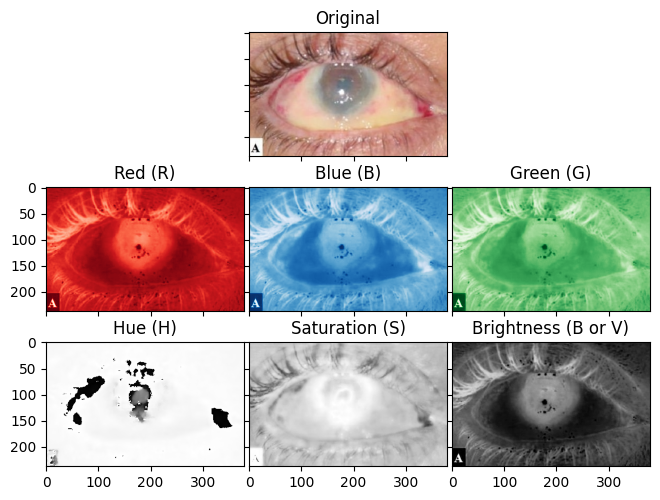

In [152]:
image = EyeTraumaAnalysis.Image("data/01_raw/00001_li.jpg")
img_rgb1 = image.img
img_hsv1 = mpl.colors.rgb_to_hsv(img_rgb1[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
axs[0,0].axis("off")
axs[0,1].imshow(img_rgb1)
axs[0,1].set_title("Original")
axs[0,2].axis("off")

axs[1,0].imshow(img_rgb1[...,0], vmin=0, vmax=255, cmap="Reds");
axs[1,0].set_title("Red (R)")
axs[1,1].imshow(img_rgb1[...,1], vmin=0, vmax=255, cmap="Blues");
axs[1,1].set_title("Blue (B)")
axs[1,2].imshow(img_rgb1[...,2], vmin=0, vmax=255, cmap="Greens");
axs[1,2].set_title("Green (G)")
axs[2,0].imshow(img_hsv1[...,0], vmin=0, vmax=255, cmap="Greys");
axs[2,0].set_title("Hue (H)")
axs[2,1].imshow(img_hsv1[...,1], vmin=0, vmax=255, cmap="Greys");
axs[2,1].set_title("Saturation (S)")
axs[2,2].imshow(img_hsv1[...,2], vmin=0, vmax=255, cmap="Greys");
axs[2,2].set_title("Brightness (B or V)")

fig.tight_layout(pad=0)

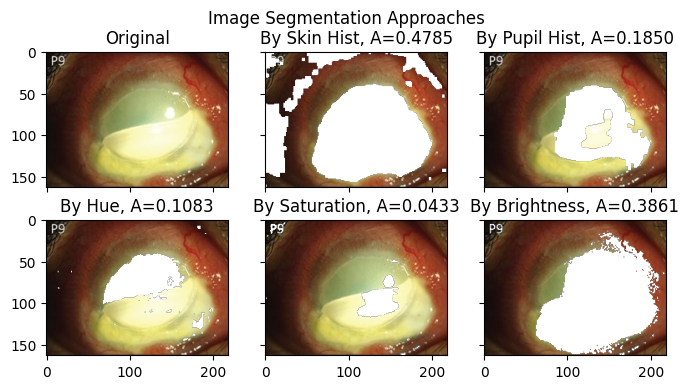

In [165]:
def show_image_seg_approaches(image, plot_region_boundaries=False):
    img_hsv = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)
    ht, wd, ch = img_hsv.shape;
    center = (int(wd/2),int(ht/2));
    bottom_region_cutoff = int(ht*95/100)

    kernel = np.ones((int(wd/50),int(ht/50)),np.uint8)

    # Segmentation by hardcoded HSV ranges
    frame_threshold1 = cv2.inRange(img_hsv, (0, 0, 0), (30, 255,255))
    target1 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold1)
    frame_threshold2 = cv2.inRange(img_hsv, (0, 50, 0), (255, 255,255))
    target2 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold2)
    frame_threshold3 = cv2.inRange(img_hsv, (0, 0, 00), (255, 255,160))
    target3 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold3)

    # get bottom region as ground truth for skin
    region_hsv1 = img_hsv[bottom_region_cutoff:,:,:3]  # :3 removes alpha channel
    percentiles1 = np.quantile(region_hsv1,[0.01, 0.99], axis=[0,1])    #
    frame_threshold4 = cv2.inRange(img_hsv, percentiles1[0], percentiles1[1])
    frame_threshold4 = cv2.morphologyEx(frame_threshold4, cv2.MORPH_CLOSE, kernel)
    frame_threshold4 = cv2.morphologyEx(frame_threshold4, cv2.MORPH_OPEN, kernel)
    target4 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold4)

    if plot_region_boundaries:
        # Draw marker indicating where the edge of ground truth region for skin is
        target4=cv2.line(target4,(0,bottom_region_cutoff),(int(wd/20),bottom_region_cutoff),(0,255,0,255),2)

    center_region_mask = np.zeros(img_hsv.shape[:2]);
    center_region_mask = cv2.circle(center_region_mask, center, int(ht/10), 255, -1)
    center_region_hsv = img_hsv.reshape( (-1,ch) )[center_region_mask.flatten().astype(bool),:]
    percentiles2 = np.quantile(center_region_hsv,[0.01, 0.99], axis=[0])    #
    frame_threshold5 = cv2.inRange(img_hsv, percentiles2[0], percentiles2[1])
    frame_threshold5 = cv2.morphologyEx(frame_threshold5, cv2.MORPH_CLOSE, kernel)
    frame_threshold5 = cv2.morphologyEx(frame_threshold5, cv2.MORPH_OPEN, kernel)
    kernel = np.ones((int(wd/50),int(ht/50)),np.uint8)
    target5 = cv2.bitwise_and(image.img,image.img, mask=~frame_threshold5)
    if plot_region_boundaries:
        # Draw center point to make sure it is at the pupil
        target5 = cv2.circle(target5, center, int(wd/20), (0,255,0,255), 2)

    # Start plotting
    fig, axs = plt.subplots(2, 3, figsize=(8,4), sharex=True, sharey=True)
    axs[0,0].imshow(image.img);
    axs[0,0].set_title("Original");

    axs[1,0].imshow(target1);
    axs[1,0].set_title(f"By Hue, A={1-np.count_nonzero(frame_threshold1)/frame_threshold3.size:.4f}");
    axs[1,1].imshow(target2);
    axs[1,1].set_title(f"By Saturation, A={1-np.count_nonzero(frame_threshold2)/frame_threshold3.size:.4f}");
    axs[1,2].imshow(target3);
    axs[1,2].set_title(f"By Brightness, A={1-np.count_nonzero(frame_threshold3)/frame_threshold3.size:.4f}");

    axs[0,1].imshow(target4);
    axs[0,1].set_title(f"By Skin Hist, A={1-np.count_nonzero(frame_threshold4)/frame_threshold3.size:.4f}");

    axs[0,2].imshow(target5);
    axs[0,2].set_title(f"By Pupil Hist, A={np.count_nonzero(frame_threshold5)/frame_threshold3.size:.4f}");
    fig.suptitle("Image Segmentation Approaches");

image = EyeTraumaAnalysis.Image("data/01_raw/00010_li.jpg")
show_image_seg_approaches(image, plot_region_boundaries=False)

Text(0.5, 0.98, 'Edge Detection Methods')

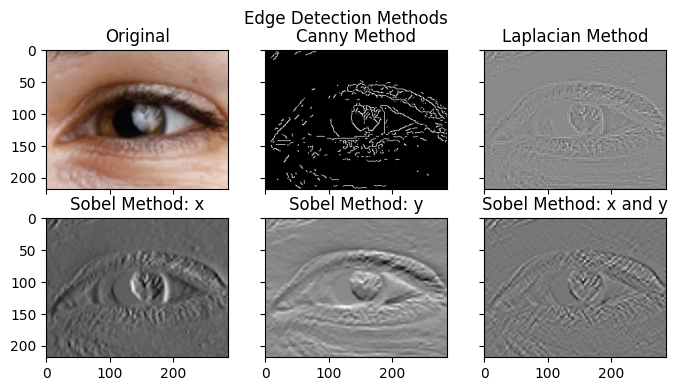

In [86]:
image = EyeTraumaAnalysis.Image("data/01_raw/11006.jpg")
img_hsv = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)
img_gray = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2GRAY)
#img_blur = cv2.GaussianBlur(img_gray, (4,4), 0)

fig, axs = plt.subplots(2, 3, figsize=(8,4), sharex=True, sharey=True)
axs[0,0].imshow(image.img)
axs[0,0].set_title("Original");


canny = cv2.Canny(image.img, threshold1=90, threshold2=100)
laplacian = cv2.Laplacian(img_gray,cv2.CV_64F)
axs[0,1].imshow(canny, cmap="gray");
axs[0,1].set_title("Canny Method");
axs[0,2].imshow(laplacian, cmap="gray");
axs[0,2].set_title("Laplacian Method");


# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images

axs[1,0].imshow(sobelx, cmap="gray");
axs[1,0].set_title("Sobel Method: x")
axs[1,1].imshow(sobely, cmap="gray");
axs[1,1].set_title("Sobel Method: y")
axs[1,2].imshow(sobelxy, cmap="gray");
axs[1,2].set_title("Sobel Method: x and y");
#axs[0,2].imshow(cv2.cvtColor(bottom_region_hsv, cv2.COLOR_HSV2RGB));
fig.suptitle("Edge Detection Methods")

In [95]:
[
    [np.min(canny), np.median(canny), np.mean(canny), np.max(canny)],
    [np.min(laplacian), np.median(laplacian), np.mean(laplacian),  np.max(laplacian)],
    [np.min(sobelx), np.median(sobelx), np.mean(sobelx),  np.max(sobelx)],
    [np.min(sobely), np.median(sobely), np.mean(sobely),  np.max(sobely)],
    [np.min(sobelxy), np.median(sobelxy), np.mean(sobelxy), np.max(sobelxy)],
]

[[0, 0.0, 11.582979332728748, 255],
 [-55.0, 0.0, -0.01824893004311648, 47.0],
 [-2208.0, 0.0, -2.4264712901532146, 3716.0],
 [-3425.0, -25.0, 20.588150128076624, 2948.0],
 [-477.0, 0.0, -0.06677485561548374, 550.0]]